In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def reverse(c,d):
    reverse = np.zeros(len(c)*2 + 1)
    for i in range(len(c)):
        reverse[2*i] = (c[i] + d[i]) / np.sqrt(2)
        reverse[2*i + 1] = (c[i] - d[i]) / np.sqrt(2)
    reverse[-1] = reverse[-2]
    return reverse

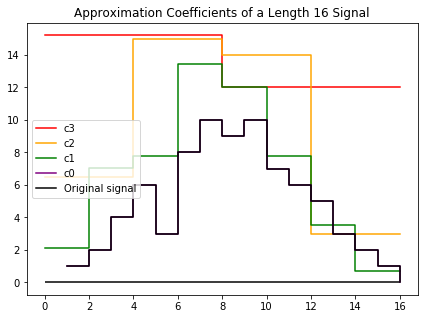

In [6]:
c_0 = np.array([1,2,4,6,3,8,10,9,10,7,6,5,3,2,1,0])
d_1 = np.array([-1,-2,-5,1,3,1,1,1]) / np.sqrt(2)
d_1_ = np.array([-1,-2,-5,1,3,1,1,1,1]) / np.sqrt(2)
d_2 = np.array([-7,-8,6,4]) / 2
d_2_ = np.array([-7,-8,6,4,4]) / 2
d_3 = np.array([-17,22]) / np.sqrt(8)
d_3_ = np.array([-17,22,22]) / np.sqrt(8)
c_3 = np.array([43,34]) / np.sqrt(8) #for calculating c_2
c_3_ = np.array([43,34,34]) / np.sqrt(8) #for plotting
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,16])

plt.figure(figsize=(7,5))
ic_2 = reverse(c_3,d_3)
ic_1 = reverse(ic_2[0:-1],d_2)
ic_0 = reverse(ic_1[0:-1],d_1)

plt.step([0,8,16], c_3_, 'red', where='post',label = "c3")
plt.step([0,4,8,12,16], ic_2, 'orange', where='post',label = "c2")
plt.step([0,2,4,6,8,10,12,14,16], ic_1, 'green', where='post',label = "c1")
plt.step(x, ic_0, 'purple', where='post',label = "c0")

plt.step(x[0:-1],c_0,'k',where='post', label='Original signal')
plt.hlines(0,xmin=0,xmax=16)
plt.legend(loc='center left')
plt.title("Approximation Coefficients of a Length 16 Signal")
plt.show()

In [77]:
import pywt

In [80]:
c1,d1 = pywt.dwt(c_0, 'haar')
c2,d2 = pywt.dwt(c1, 'haar')
c3,d3 = pywt.dwt(c2, 'haar')

In [86]:
d3 - d_3
d2 - d_2
d1 - d_1

array([ -1.11022302e-16,  -4.44089210e-16,  -4.44089210e-16,
        -4.44089210e-16,   4.44089210e-16,   4.44089210e-16,
         2.22044605e-16,   1.11022302e-16])

In [87]:
ic2 = pywt.idwt(c3,d3,'haar')
ic1 = pywt.idwt(ic2,d2,'haar')
ic0 = pywt.idwt(ic1,d1,'haar')

In [117]:
ic0 - reverse(ic_1[0:-1],d_1)[0:-1]

array([  1.77635684e-15,   1.99840144e-15,   3.10862447e-15,
         3.55271368e-15,   5.32907052e-15,   6.21724894e-15,
         8.88178420e-15,   8.88178420e-15,   7.10542736e-15,
         6.21724894e-15,   5.32907052e-15,   5.32907052e-15,
         1.33226763e-15,   1.11022302e-15,   8.88178420e-16,
         4.57558474e-16])

In [128]:
d3

array([-6.01040764,  7.77817459])